In [5]:
## Standard imports
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/DSGA1018 Project

/content/drive/MyDrive/DSGA1018 Project


S&P 500

In [42]:
DATA_DIR="/content/drive/MyDrive/DSGA1018 Project/Data"
File_PATH = os.path.join(DATA_DIR, "SP500.csv")

sp500 = pd.read_csv(File_PATH)

In [43]:
sp500 = sp500[::-1]
sp500.reset_index(drop=True, inplace=True)
sp500.columns = ['Date', 'Open', 'High', 'Low', 'Close']
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [44]:
sp500['ret'] = sp500['Close'].pct_change()
sp500.dropna(inplace=True)

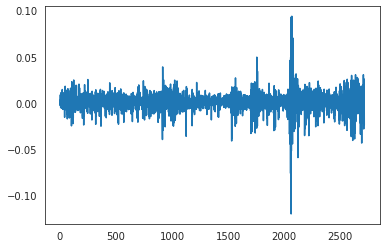

In [46]:
sp500['ret'].plot();

In [47]:
result = ts.adfuller(sp500['ret'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.842435
p-value: 0.000000
Critical Values: {'1%': -3.4327860097199814, '5%': -2.862616249081039, '10%': -2.5673429234848517}


Reject null hypothesis which is there is a unit root. The data is stationary.

Individual stocks

In [88]:

def stockPreprocess(name):
    File_PATH = os.path.join(DATA_DIR, name + ".csv")

    print("------------")
    print(name)
    stock = pd.read_csv(File_PATH)
    stock['Date'] = pd.to_datetime(stock['Date'])

    stock['Adj_Close'] = stock['Close'] + stock['Dividends'].cumsum()

    stock['ret'] = stock['Adj_Close'].pct_change()
    stock.dropna(inplace=True)
    stock['ret'].plot()
    plt.title(name)
    plt.show();

    result = ts.adfuller(stock['ret'])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:', result[4])

    if result[1] > 1e-05:
        print("Not stationary")
    else:
        print('Stationary')

    return stock

------------
AAL


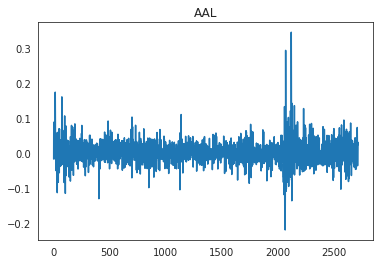

ADF Statistic: -14.001033
p-value: 0.000000
Critical Values: {'1%': -3.4327751686716304, '5%': -2.8626114613655744, '10%': -2.5673403744927143}
Stationary
------------
AMZN


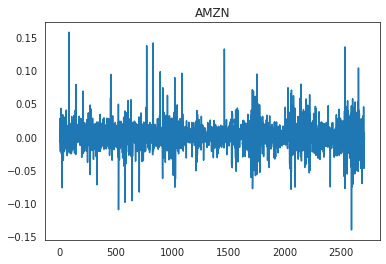

ADF Statistic: -14.960377
p-value: 0.000000
Critical Values: {'1%': -3.432776068405479, '5%': -2.862611858714308, '10%': -2.5673405860421004}
Stationary
------------
DB


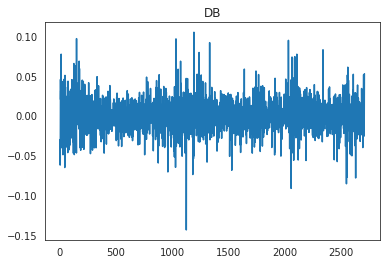

ADF Statistic: -34.641991
p-value: 0.000000
Critical Values: {'1%': -3.432764423688327, '5%': -2.8626067160580204, '10%': -2.567337848081528}
Stationary
------------
PFE


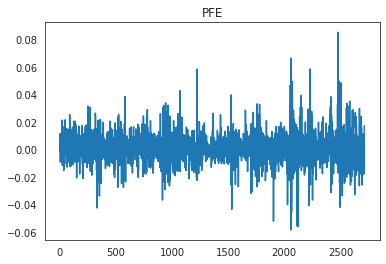

ADF Statistic: -11.720942
p-value: 0.000000
Critical Values: {'1%': -3.432780577107336, '5%': -2.8626138498868667, '10%': -2.567341646147285}
Stationary
------------
WMT


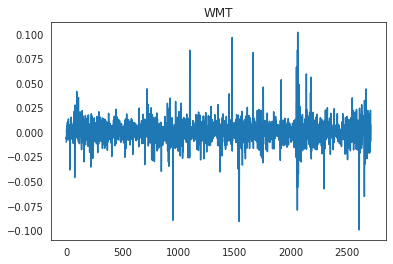

ADF Statistic: -17.975278
p-value: 0.000000
Critical Values: {'1%': -3.43277067999415, '5%': -2.862609479032774, '10%': -2.567339319094438}
Stationary


In [89]:
names = ['AAL', 'AMZN', 'DB', 'PFE', 'WMT']
for name in names:
    stock = stockPreprocess(name)

## Download form yahoo finance

In [1]:
import yfinance as yf

In [13]:
#SPY = SP500
tickers = ['SPY', 'AAL', 'AMZN', 'PFE', 'DB', 'WMT']

In [8]:
amzn_df = yf.download(tickers[0])

[*********************100%***********************]  1 of 1 completed


In [9]:
amzn_df = amzn_df['2012-01-04':'2022-10-14']

In [10]:
amzn_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-04,5.09,5.18,4.97,5.03,4.741989,5268700
2012-01-05,5.15,5.48,5.07,5.47,5.156796,8216100
2012-01-06,5.44,5.67,5.40,5.60,5.279352,8323000
2012-01-09,5.56,5.80,5.55,5.72,5.392481,8029900
2012-01-10,5.81,5.81,5.61,5.72,5.392481,6086500
...,...,...,...,...,...,...
2022-10-10,12.20,12.32,11.86,12.05,12.050000,29602600
2022-10-11,12.74,12.86,11.79,12.26,12.260000,64438100
2022-10-12,12.21,12.83,11.98,12.70,12.700000,40359200


In [11]:
sp500 = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [12]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334028,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514204,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568270,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838556,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500
...,...,...,...,...,...,...
2022-11-16,396.779999,397.779999,394.790009,395.450012,395.450012,68508500
2022-11-17,390.459991,394.950012,390.140015,394.239990,394.239990,74496300
2022-11-18,397.739990,397.809998,393.040009,396.029999,396.029999,92783500
